In [1]:
# 텐서프롤에 내장된 MNNIST 데이터셋 불러오기
import tensorflow as tf
mnist = tf.keras.datasets.mnist
# x_train: 학습할 28*28크기의 영상
# y_train: 데이터의 정답 라벨
# x_test: 검증에 쓰일 영상
# y_test: 검증영상에 대한 라벨
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# 255로 나누어 0.0~1.0 사이의 값으로 정규화 수행
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
# 128 노드를 가지는 은닉 RELU 1계층과 softmax 활성함수를 가지는 10개의 노드 출력층
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28)),  # Input 레이어를 사용하여 입력 형태 정의
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dense(128, activation='sigmoid'),# 은닉계층의 노드 개수를 64로 변환
  tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 10번 학습 수행
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.8342 - loss: 0.6614
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.9396 - loss: 0.2141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9576 - loss: 0.1464
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9686 - loss: 0.1148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9751 - loss: 0.0893


In [14]:
# 테스트에 대해서 오차 계산
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 738us/step - accuracy: 0.9681 - loss: 0.1018


[0.1018335297703743, 0.9681000113487244]

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [16]:
import numpy as np

samples=np.random.choice(x_test.shape[0])

x_predict=x_test[samples,:,:]
y_predict=y_test[samples]

x_predict=np.expand_dims(x_predict, axis = 0)

result=model.predict(x_predict)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.4266270e-09 9.9861836e-01 1.3642420e-05 1.5663287e-04 3.2805033e-06
  4.9563303e-05 8.5398999e-05 1.1823573e-04 9.3481422e-04 2.0111243e-05]]


In [17]:
# 숫자 2에 가깝다
np.argmax(result, axis=1)

array([1], dtype=int64)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
# 결과를 그래픽으로 보여줄 메서드 정의
def showImage(imgs, labels):
    n=len(imgs)
    f=plt.figure()
    f.gca().set_axis_off()
    plt.margins(0, 0)
    for i in range(n):
        if(not np.any(imgs[i])):
            continue
        if(n<4):
            f.add_subplot(1,n,i+1)
        else:
            g_w=int(np.math.ceil(n/2))
            f.add_subplot(2,g_w,i+1)
        f.gca().xaxis.set_major_locator(plt.NullLocator())
        f.gca().yaxis.set_major_locator(plt.NullLocator())
        img=imgs[i].copy()
        img=(img*255).astype(np.uint8)
        plt.imshow(img, cmap='gray',vmin=0, vmax=255, interpolation='none')
        ax=plt.gca()
        ax.set_xlabel(labels[i],fontsize=20)
    plt.tight_layout(pad=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


C:\Users\USER\AppData\Local\Temp\ipykernel_15280\1315934360.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  g_w=int(np.math.ceil(n/2))


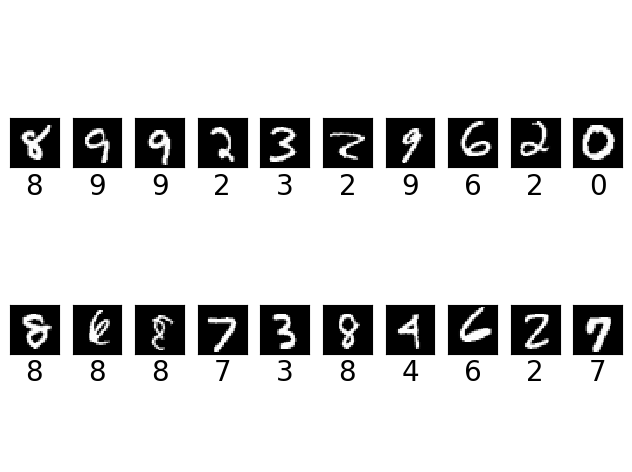

In [20]:
samples=np.random.choice(x_test.shape[0],20)
x_predict=x_test[samples,:,:]
y_predict=y_test[samples]
result=model.predict(x_predict)
preds=np.argmax(result, axis=1)
showImage(x_predict, preds)

model.save('mnist_mlp.h5')